# Problem 1: Linear Regression from Scratch


In [ ]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)

Let's generate some data points first, by the equation $y = x - 3$.

In [ ]:
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)

y = x + -3 + 0.3*np.random.randn(100)

Let's then visualize the data points we just created.

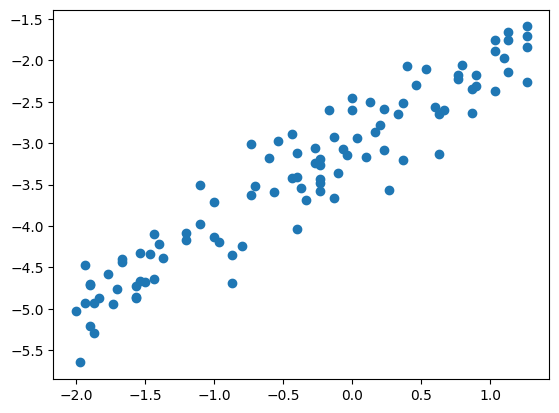

In [ ]:
plt.scatter(X, y)

## 1.1 Gradient of vanilla linear regression model (5 points)

In the lecture, we learn that the cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$

The gredient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial \theta}= \frac{1} {m} \sum_{i}^{m} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right) x^{(i)}$$




## 1.2 Gradient of vanilla regularized regression model (5 points)

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gredient of it can be written as **Equation 4**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \sum_{i}^{m} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right) x^{(i)} + \frac{\lambda}{m} \theta$$

In [ ]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """

    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features

    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )

    # stores the updates on the cost function (loss function)
    cost_history_list = []

    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process

        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)

        # calculate the difference between the actual and predicted value
        error = y_estimated - y

        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = initial_cost = (1 / (2*m)) * np.sum((error)**2)

        # regularization term
        reg_term = (lambda_value/(2*m)) * np.sum(W**2)

        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term

        # calculate the gradient of the cost function with regularization term (Equation )
        gradient = (1 / m) * X.T.dot(error) + (lambda_value / m) * W

        # Now we have to update our weights
        W = W - alpha * gradient

        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)

    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")

    return W, cost_history_list

Cost with regularization: 0.05165888565058274
Mean square error: 0.05165888565058274


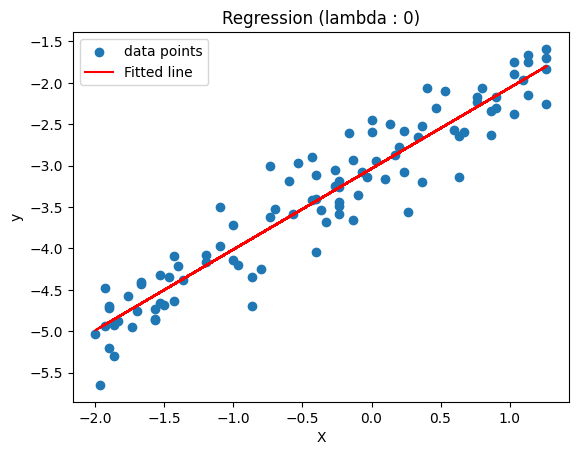

Cost with regularization: 0.5181225049184746
Mean square error: 0.08982014821513126


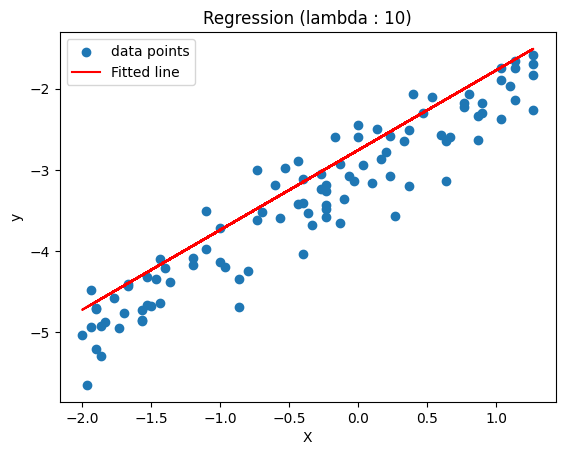

Cost with regularization: 2.793172488740026
Mean square error: 1.2785107029715974


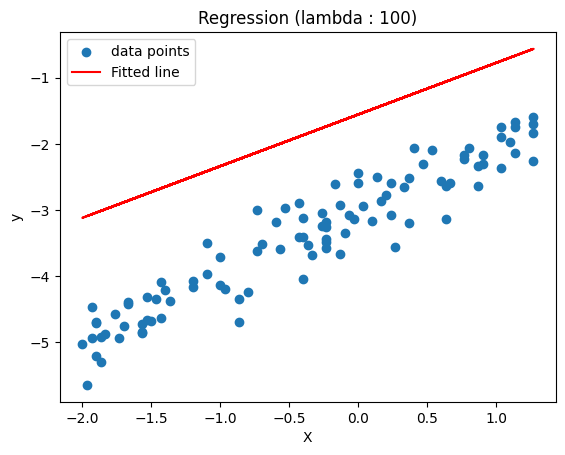

Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066496


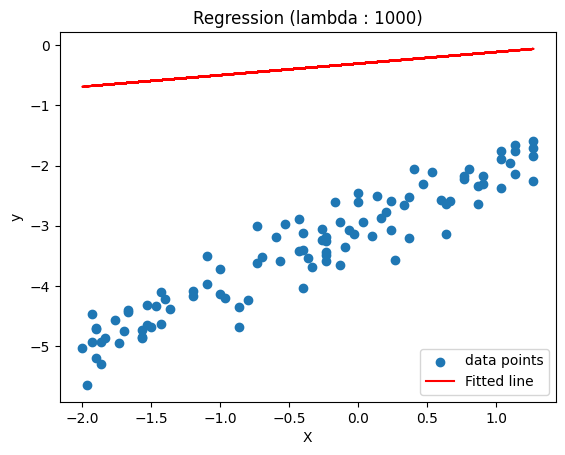

Cost with regularization: 6.2426956269339735
Mean square error: 6.1614425833558135


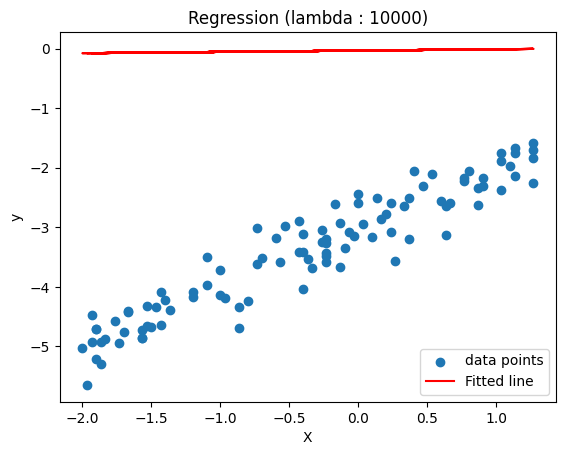

In [ ]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01, lambda_value=lambda_, epochs=1000)

    fitted_line = np.dot(X, weight[1]) + weight[0]
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()

## 1.5 Analyze your results (10 points)


According to the above figures, what's the best choice of $\lambda$?

Why the regressed line turns to be flat as we increase $\lambda$?

The best choice of λ would be λ = 0 since the cost is minimum when λ=0.

As we increase λ, the model starts underfitting the data and thus the line becomes flatter.

# Problem 2: Getting familiar with PyTorch

In [ ]:
!unzip -q mltools.zip

In [ ]:
import mltools as ml
import torch
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Loading data

In [ ]:
data = np.genfromtxt("curve80.txt")
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
degree = 5
XtrP = ml.transforms.fpoly(Xtr, degree=degree, bias=False)
XtrP,params = ml.transforms.rescale(XtrP)

In [ ]:
XtrP_tensor = torch.tensor(XtrP).float()
Ytr_tensor = torch.tensor(Ytr).float()
print("XtrP_tensor shape:", XtrP_tensor.shape)
print("Ytr_tensor shape:", Ytr_tensor.shape)

XtrP_tensor shape: torch.Size([60, 5])
Ytr_tensor shape: torch.Size([60])


## 2.2 Initialize Linear Regressor

In [ ]:
linear_regressor = torch.nn.Linear(in_features=XtrP_tensor.shape[1], out_features=1)

## 2.3 Set up optimizer and criterion

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regressor.parameters(), lr=0.1)
epochs = 100000

## 2.4 Training the regressor using gradient descent

In [ ]:
loss_record = []
for epoch in range(epochs):
 optimizer.zero_grad()
 pred_y = linear_regressor(XtrP_tensor)
 loss = criterion(pred_y, Ytr_tensor.view(-1, 1))
 loss.backward()
 optimizer.step()
 loss_record.append(loss.item())
 if (epoch + 1) % 10000 == 0:
  print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

Epoch 10000/100000, Loss: 1.7575914859771729
Epoch 20000/100000, Loss: 1.440092921257019
Epoch 30000/100000, Loss: 1.2632062435150146
Epoch 40000/100000, Loss: 1.164598822593689
Epoch 50000/100000, Loss: 1.1095702648162842
Epoch 60000/100000, Loss: 1.0788044929504395
Epoch 70000/100000, Loss: 1.06154203414917
Epoch 80000/100000, Loss: 1.051801085472107
Epoch 90000/100000, Loss: 1.0462476015090942
Epoch 100000/100000, Loss: 1.043025255203247


## 2.5 Plot the loss v.s. epochs

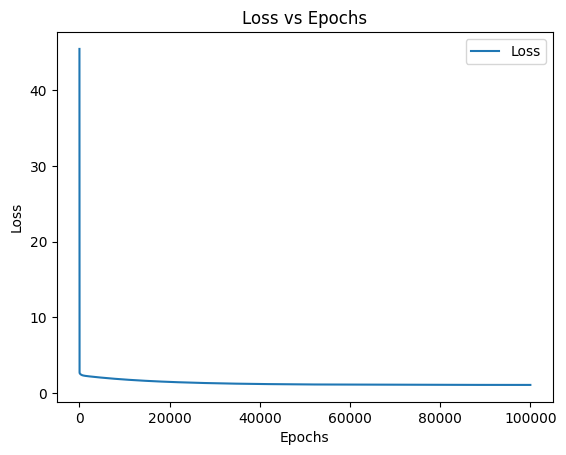

In [ ]:
plt.plot(range(epochs), loss_record, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

## 2.6 Visualize the trained linear regressor

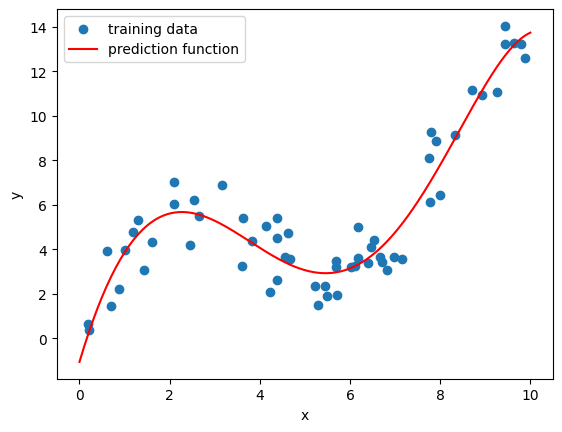

In [ ]:
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
xsP, _ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree=degree,bias=False), params)
xsP_tensor = torch.from_numpy(xsP).float()
ys = linear_regressor(xsP_tensor)

plt.scatter(Xtr,Ytr,label="training data")
plt.plot(xs, ys.detach().numpy(), label="prediction function", color ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()